In [ ]:
import numpy as np
import random
import cv2

def lerimg(img, printar=False):
    with open(img) as image_file:
      image=image_file.readlines()
    assert image[0][:2] == 'P2', "Imagem com formato inválido"
    img=[]
    for i in image:
      self.img.extend([int(p) for p in i.split() if p.isdigit()])

    ncolunas, nlinhas, niveis=self.img.pop(0),self.img.pop(0),(self.img.pop(0)+1)
    img= np.array(img)
    img = img.reshape(nlinhas, ncolunas)
    return img
    if printar:
      plt.figure(figsize=(20,10))
      plt.imshow(img, cmap='gray')
      plt.show()


def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    snp = image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                snp[i][j] = 0
            elif rdn > (1-prob):
                snp[i][j] = 255
#    if printar:
      plt.figure(figsize=(20,10))
      plt.imshow(snp, cmap='gray')
      plt.show()
    return snp

def median_filter(img,n):
    self.lerimg()
    median_img = cv2.medianBlur(np.float32(self.img), n)
    stack=np.hstack((self.img,median_img))
    plt.figure(figsize=(20,10))
    plt.imshow(stack, cmap='gray')
    plt.show()
image = cv2.imread('gator.pgm',0) # Only for grayscale image
noise_img = sp_noise(image,0.5)
plt.figure(figsize=(20,10))
plt.title('Origin/Gaussian/SnP')
plt.imshow(noise_img, cmap='gray')
plt.show()

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
import imageio
import numpy as np
import cv2

def lerimg(img, printar=False):
    with open(img) as image_file:
      image=image_file.readlines()
    assert image[0][:2] == 'P2', "Imagem com formato inválido"
    img=[]
    for i in image:
      img.extend([int(p) for p in i.split() if p.isdigit()])

    ncolunas, nlinhas, niveis=img.pop(0),img.pop(0),(img.pop(0)+1)
    img= np.array(img)
    img = img.reshape(nlinhas, ncolunas)
    if printar:
      plt.figure(figsize=(20,10))
      plt.imshow(img, cmap='gray')
      plt.show()
    return img

In [50]:
import numpy as np
img=[[0, 0 , 0, 1, 2],
      [1, 1, 0, 1, 1],
      [2, 2 , 1, 0, 0 ],
      [1, 1 ,0 ,2 ,0 ],
      [0, 0, 1, 0,1]]

img=lerimg("gator.pgm")
img= np.array(img)
max=np.amax(img)+1
matrix=np.zeros((max,max))
for m in range (img.shape[0]-1):
  for n in range (img.shape[1]-1):
    linha=(img[m][n])
    coluna=(img[m+1][n+1])
    matrix[linha][coluna]+=1
print (matrix)

[[461. 127.  95. ...   0.   0.   0.]
 [127.  46.  23. ...   0.   0.   0.]
 [ 89.  25.  29. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  47.  44. 103.]
 [  0.   0.   0. ...  61.  69. 128.]
 [  0.   0.   0. ... 108. 141. 500.]]


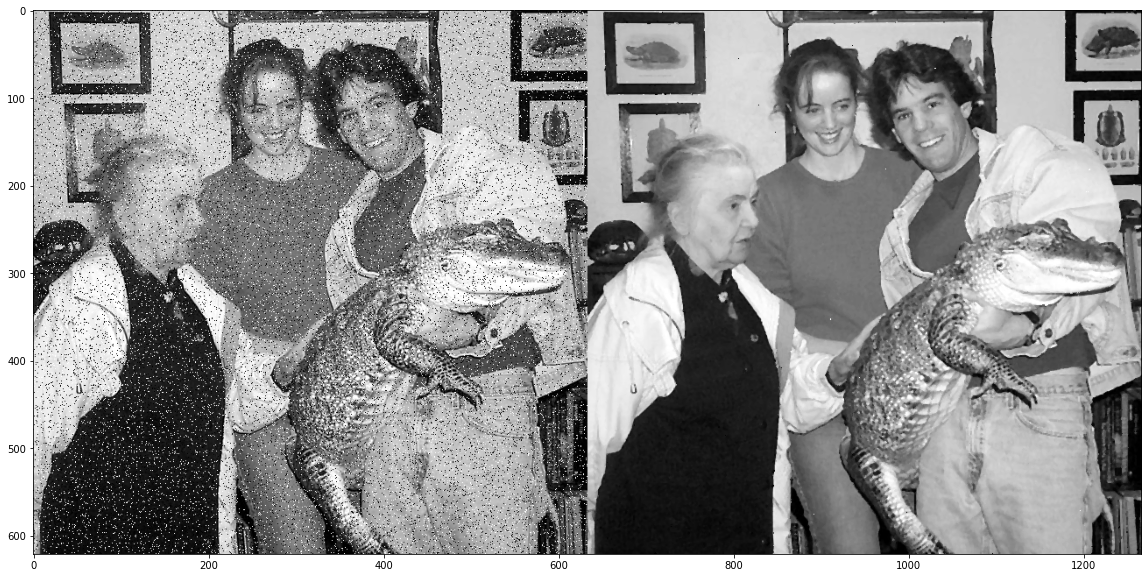

In [ ]:
gator=lerimg('gator.pgm')
gator_snp=sp_noise(gator,0.05)
gator_snp_median=median=median_filter(gator_snp,3,stack=True)

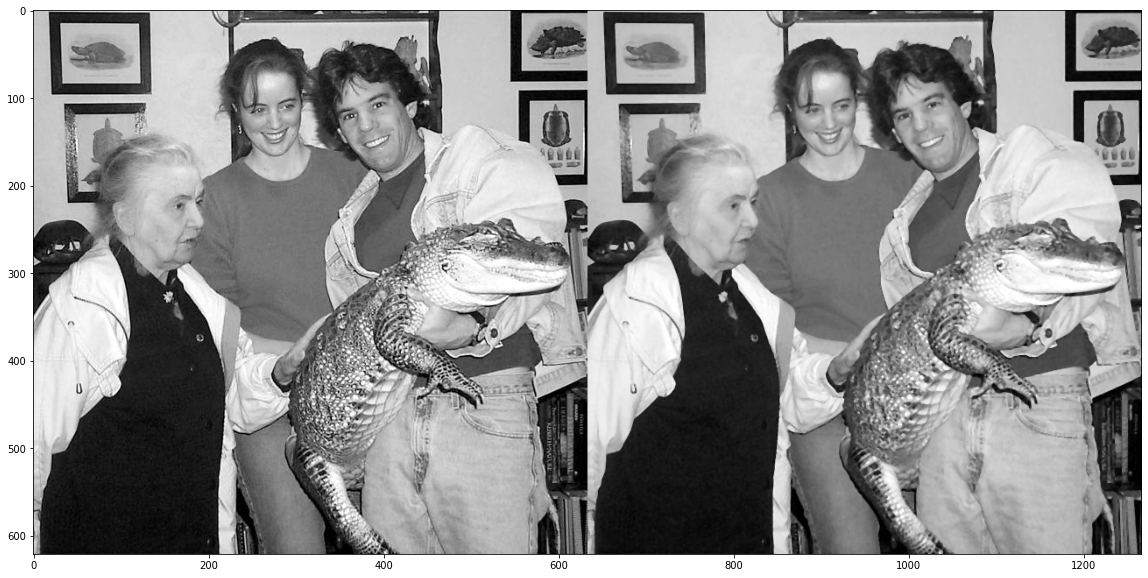

array([[200., 199., 198., ...,  14.,  12.,  12.],
       [198., 198., 199., ...,  11.,  10.,   9.],
       [198., 198., 199., ...,  11.,  10.,   9.],
       ...,
       [202., 191., 186., ...,  27.,  43.,  43.],
       [196., 188., 178., ...,  39.,  42.,  34.],
       [196., 181., 170., ...,  39.,  39.,  30.]], dtype=float32)

In [ ]:
median_filter(gator,3,stack=True)

In [45]:
import matplotlib.pyplot as plt
import imageio
import numpy as np
import cv2
import random
from skimage import data
from skimage.filters.rank import majority,maximum, minimum, modal
from skimage.morphology import disk
import time
from scipy.signal.signaltools import wiener


def lerimg(img, printar=False):
    with open(img) as image_file:
      image=image_file.readlines()
    assert image[0][:2] == 'P2', "Imagem com formato inválido"
    img=[]
    for i in image:
      img.extend([int(p) for p in i.split() if p.isdigit()])

    ncolunas, nlinhas, niveis=img.pop(0),img.pop(0),(img.pop(0)+1)
    img= np.array(img)
    img = img.reshape(nlinhas, ncolunas)
    if printar:
      plt.figure(figsize=(20,10))
      plt.imshow(img, cmap='gray')
      plt.show()
    return img
def sp_noise(image,prob,printar=False,stack=False):
    snp = image.copy()
    ini = time.time()


    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                snp[i][j] = 0
            elif rdn > (1-prob):
                snp[i][j] = 255
    fim = time.time()
    print(ini-fim)
    if printar:
      plt.figure(figsize=(20,10))
      plt.imshow(snp, cmap='gray')
      plt.show()
    return snp
def sp_noise1(image,prob,printar=False,stack=False):
    snp = image.copy()
    ini = time.time()
    snp=snp.reshape((image.shape[0]*image.shape[1]))
    for i in range(int((image.shape[0]*image.shape[1])*prob)):
      snp[np.random.randint(0,snp.shape)]=np.random.choice([0, 255])
    snp=snp.reshape((image.shape))
    fim = time.time()
    print(ini-fim)
    if printar:
      plt.figure(figsize=(20,10))
      plt.imshow(snp, cmap='gray')
      plt.show()
    return snp    
def gaussian_noise(image,mean,sigma,printar=False,stack=False):
    gauss = np.float32(image.copy())
    gauss+=np.random.normal(mean,sigma,(image.shape))
    if printar:
      plt.figure(figsize=(20,10))
      plt.imshow(gauss, cmap='gray')
      plt.show()
    return gauss

def rayleigh_noise(image,level,printar=False,stack=False):
    rayleigh = np.float32(image.copy())
    rayleigh+=np.random.rayleigh(level,(image.shape))
    if printar:
      plt.figure(figsize=(20,10))
      plt.imshow(rayleigh, cmap='gray')
      plt.show()
    return rayleigh
def poisson_noise(image,lambd,printar=False,stack=False):
    poisson = np.float32(image.copy())
    poisson+=np.random.poisson(lambd,(image.shape))
    if printar:
      plt.figure(figsize=(20,10))
      plt.imshow(poisson, cmap='gray')
      plt.show()
    return poisson

def filter_image(image,type,n=3,printar=False,stack=False):
    img=image.copy()
    output_img=None
    if type=='median':
      output_img = cv2.medianBlur(np.float32(img), n)
    elif type=='average':
      output_img =cv2.blur(np.float32(img),(n,n))
    elif type=='conv':
      mask=np.ones((n,n),np.float32)/(n*n)
      output_img=cv2.filter2D(np.float32(img),-1,mask)
    elif type=='gaussian':
      output_img=cv2.GaussianBlur(np.float32(img),(n,n),0)
    elif type=='laplacian':
      output_img=cv2.Laplacian(np.float32(img),cv2.CV_32F)
    elif type=='sobelx':
      output_img=cv2.Sobel(np.float32(img),cv2.CV_64F,1,0,ksize=5)
    elif type=='sobely':
      output_img=cv2.Sobel(np.float32(img),cv2.CV_16U,0,1,ksize=5)
    elif type=="maximum":
      output_img=maximum(np.uint8(img), np.ones((n,n)))
    elif type=="modal":
      output_img=modal(np.uint8(img), np.ones((n,n)))
    elif type=="minimum":
      output_img=minimum(np.uint8(img), np.ones((n,n)))
    elif type=="wiener":
      output_img= wiener((img), (n,n))
    else:
      print("ERROR")

    if stack:
      total=np.hstack((img,output_img))
      plt.figure(figsize=(20,10))
      plt.imshow(total, cmap='gray')
      plt.show()
      printar=False
    if printar:
      plt.figure(figsize=(20,10))
      plt.imshow(output_img, cmap='gray')
      plt.show()
    return output_img
def stack_img(img1,img2):
      total=np.hstack((img1,img2))
      plt.figure(figsize=(20,10))
      plt.imshow(total, cmap='gray')
      plt.show()


-1.7700340747833252


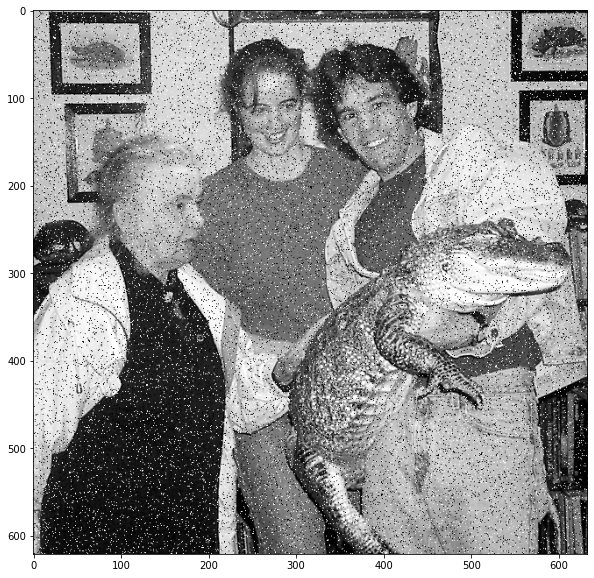

In [ ]:
gator=lerimg('gator.pgm')
i=sp_noise1(gator,0.1,printar=True)
#stack_img(gator,i)

-0.0848691463470459


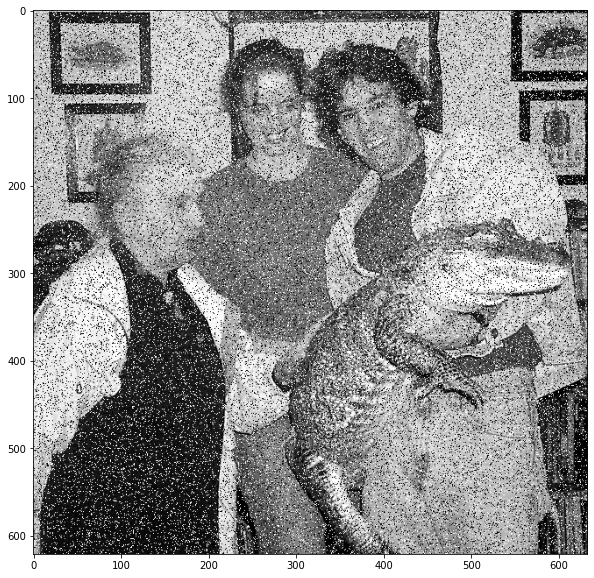

In [ ]:
gator=lerimg('gator.pgm')
i=sp_noise(gator,0.1,printar=True)

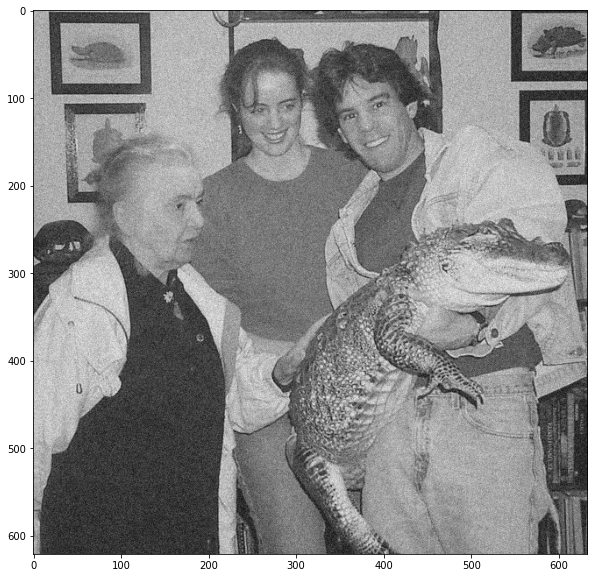

-0.15089106559753418


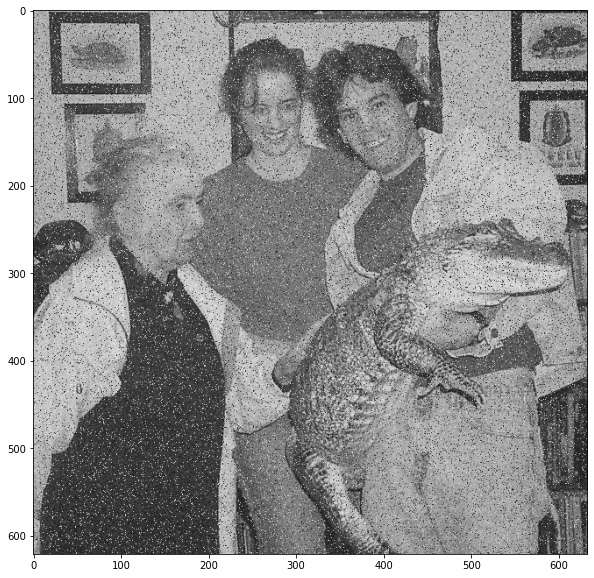

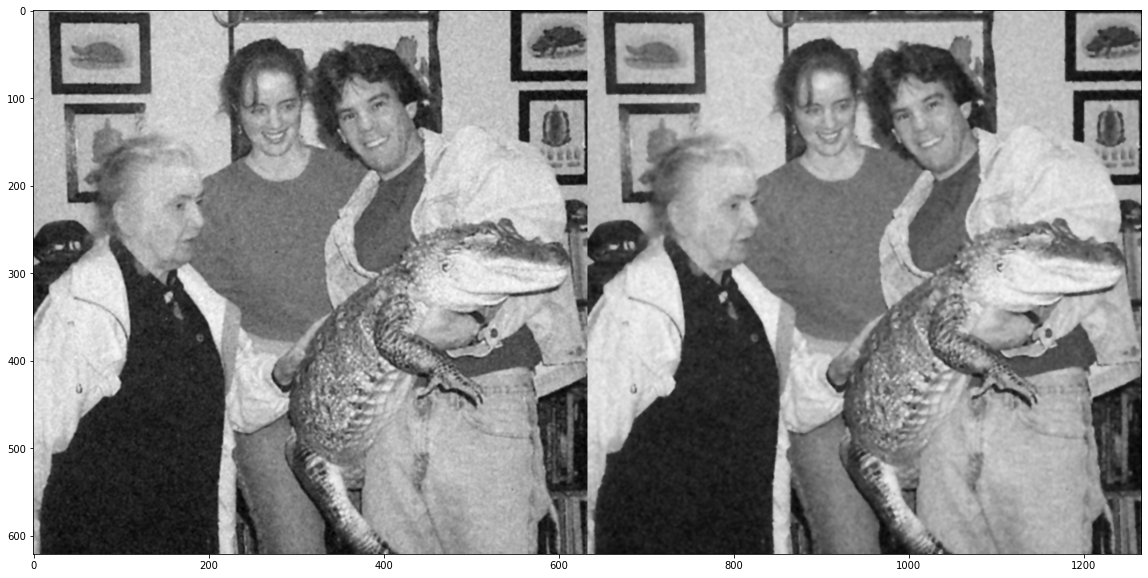

In [ ]:
gator=lerimg('gator.pgm')
gator_gaussian=gaussian_noise(gator,0,20,printar=True)

gator_snp=sp_noise(gator_gaussian,0.05,printar=True)
gator_mediaana=filter_image(gator_snp,type="median",n=3,printar=False)
gator_gaussiano=filter_image(gator_mediaana,type="gaussian",n=3)
lap=filter_image(gator_gaussiano,type='wiener',stack=True)
#gator_media=filter_image(gator_mediaana,type="average",n=3) 
#end=filter_image(gator_media,type="median",n=3) -lap
#stack_img(gator,end)
#gator_gausianno_moda=filter_image(gator_gaussiano,type="average",n=3) + filter_image(gator_gaussiano,type="laplacian",n=3)
#gator_media_moda=filter_image(gator_media,type="average",n=3) + filter_image(gator_gaussiano,type="laplacian",n=3)
#stack_img(gator_gausianno_moda,gator_media_moda)


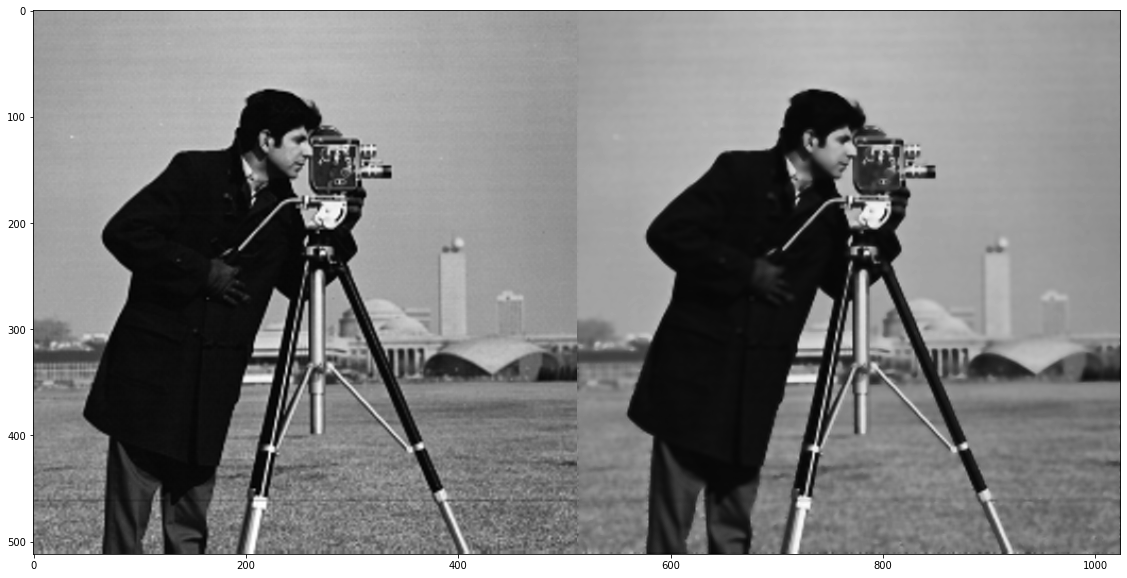

In [ ]:
image=data.camera()
im=filter_image(np.float32(image),'wiener',n=5,stack=True)

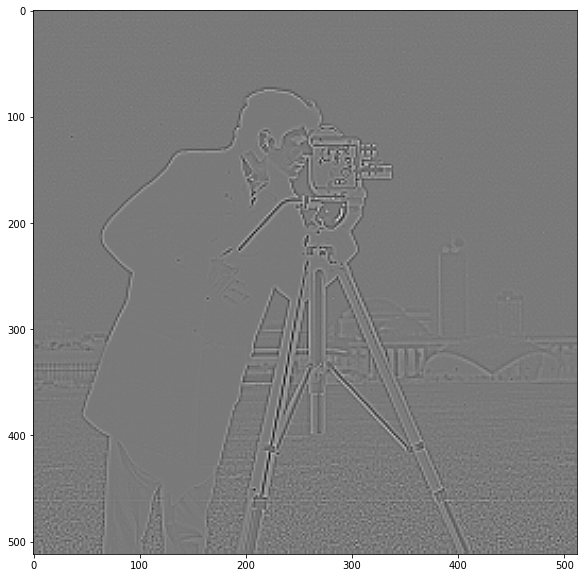

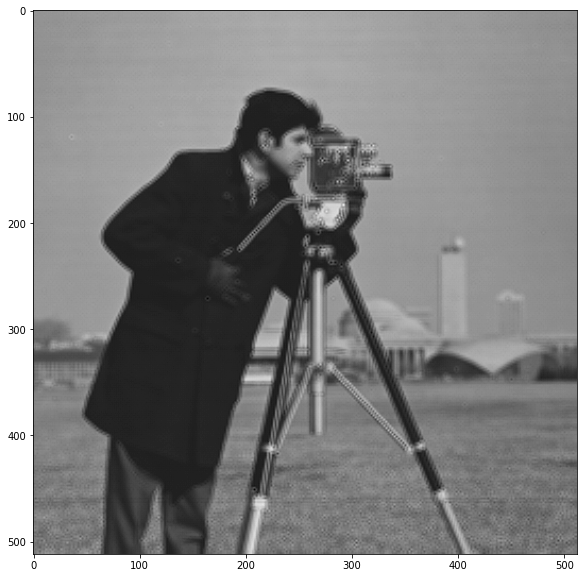

In [ ]:
#image=lerimg("gator.pgm")
image=data.camera()
#lap=filter_image(image,type="average",n=1,printar=True)
#image=gaussian_noise(image,0,20)
lap=filter_image(image,type="laplacian",printar=True)
image=lap+image
plt.figure(figsize=(20,10))
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
mona=cv2.imread("gator.pgm",0)

cv2.imshow(mona,0) 

DisabledFunctionError: ignored

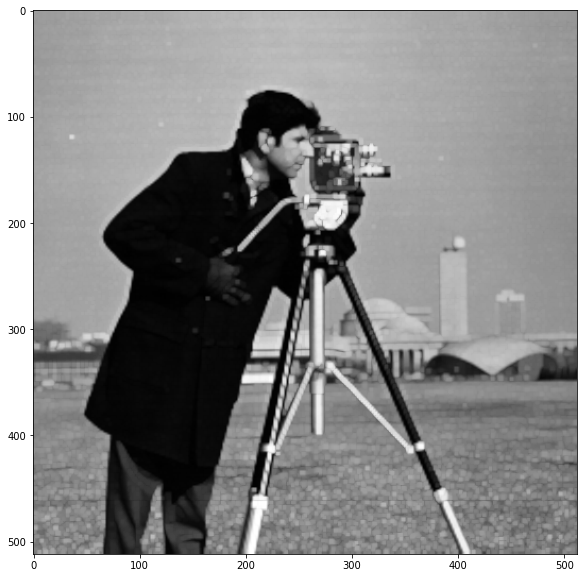

In [ ]:
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import maximum
import matplotlib.pyplot as plt
import numpy as np

img = data.camera()
n=3
out = maximum(img, np.ones((n,n),np.float32))

plt.figure(figsize=(20,10))
plt.imshow(out, cmap='gray')
plt.show()

In [ ]:
gator=filter_image(gator,type="average",n=3,printar=True)  

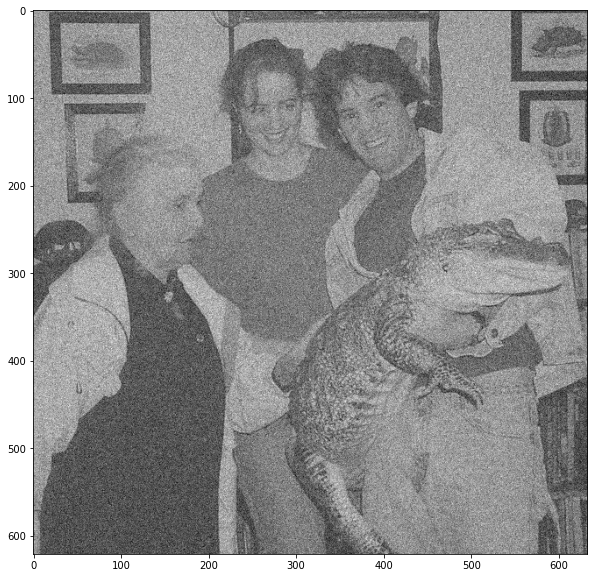

array([[131.25221 , 237.9718  , 146.998   , ..., -50.559566, 119.923035,
        -19.070269],
       [227.31328 , 246.63853 , 198.03688 , ..., -47.68535 ,  52.42109 ,
        -32.31493 ],
       [194.1155  , 186.00285 , 294.3949  , ..., -42.765266,  74.813194,
        109.520134],
       ...,
       [122.12202 , 140.22565 , 247.91621 , ...,  52.87092 ,  45.589012,
         29.722725],
       [178.03595 , 245.80931 , 138.60913 , ...,  37.061317,  70.884735,
        -22.88377 ],
       [156.89047 , 116.94282 , 248.1101  , ..., -19.157343,  12.60596 ,
        -51.784138]], dtype=float32)

In [ ]:
gaussian_noise(gator,0,50,printar=True)

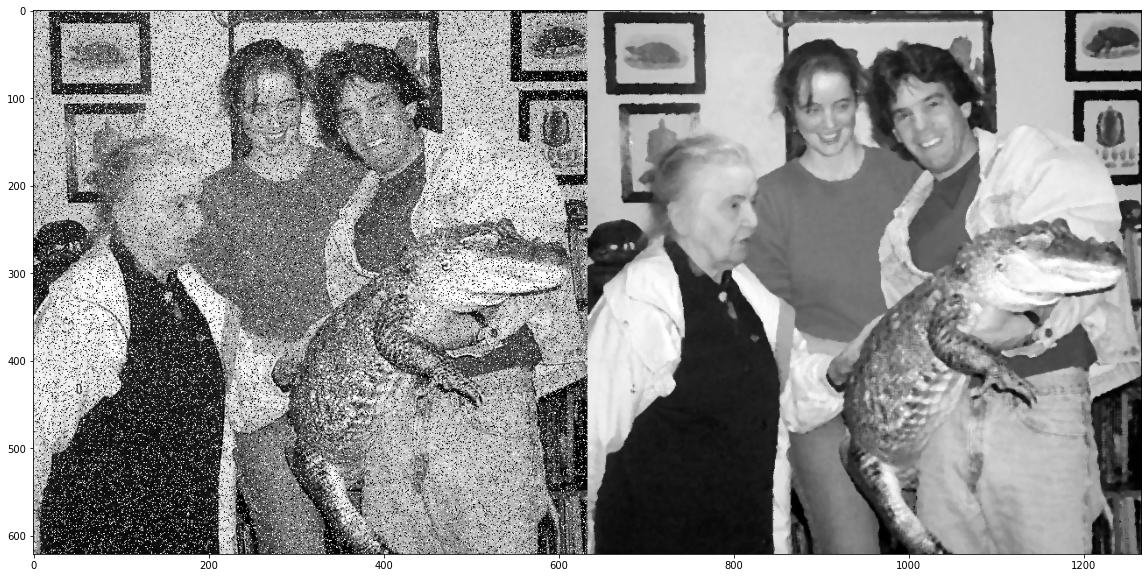

In [ ]:
gator_snp=sp_noise(gator,0.1)
gator_median=filter_image(gator_snp,"median",n=5,stack=True)